# MTH9879 Homework 6

Assigned: March 21, 2017.
Due: April 4, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### R version 3.3.2 (2016-10-31) (ubuntu)

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [2]:
load('tq.rData')
library(highfrequency)
source('RvEstimators.R')

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

#### <font color=blue> Solution (a) </font>

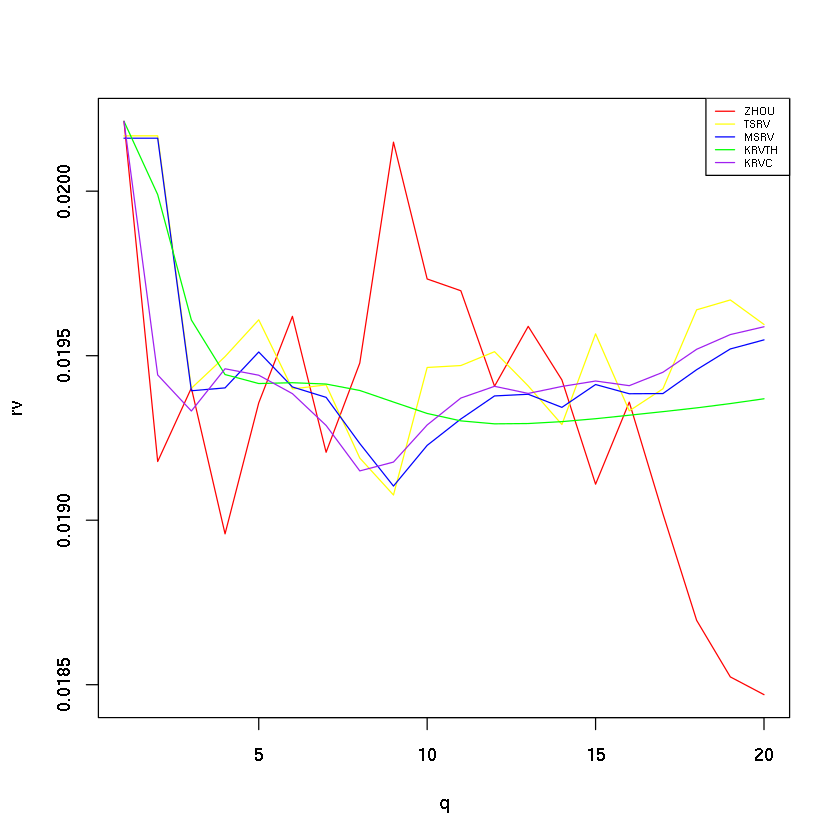

In [3]:
plot_rv <- function(px) {    
    p <- log(as.numeric(px))
    # Compute RV using functions in RvEstimators.R
    freq <- 20
    # rv_ZHOU
    plot(1:freq, sapply(1:freq, function(q){sqrt(ZHOU(p, q))}), col="red", type='l', ylab='rv', xlab='q')
    # rv_TSRV
    lines(1:freq, sapply(1:freq, function(q){sqrt(TSRV(p, q))}), col="yellow")
    # rv_MS
    lines(1:freq, sapply(1:freq, function(q){sqrt(MSRV(p, q))}), col="blue")
    # rv_KRVTH
    lines(1:freq, sapply(1:freq, function(q){sqrt(KRVTH(p, q))}), col="green")
    # rv_KRVC
    lines(1:freq, sapply(1:freq, function(q){sqrt(KRVC(p, q))}), col="purple")
    # add legend
    legend("topright", 
       c("ZHOU","TSRV","MSRV","KRVTH","KRVC"), 
       lty = c(1,1,1,1,1), col=c("red","yellow","blue","green","purple"),cex=0.5)    
}

plot_rv(tqBAC$PRICE)

(b) Repeat part (a) for the BAC mid-quote series.
#### <font color=blue> Solution (b) </font>

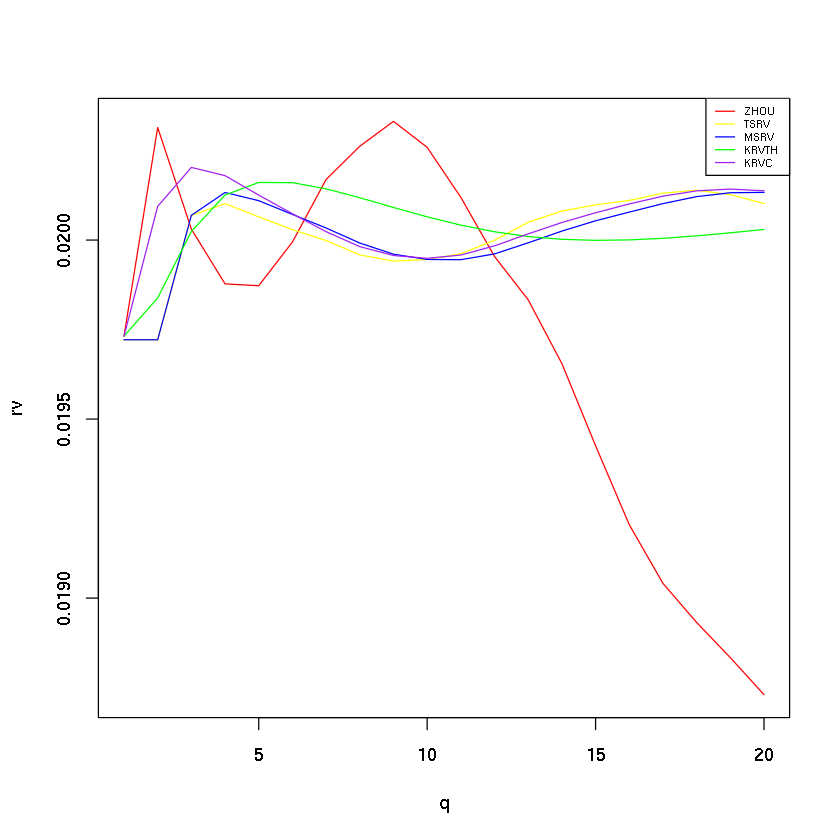

In [4]:
# Change the input to BAC mid-quote
plot_rv((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2)

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

#### <font color=blue> Solution (c) </font>
From above plot, I think KRVTH is better since it is very smooth.It becomes very stable after $q \approx 13$. So I recommend 13 as the sub-sampling frequency.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [5]:
load('tq.rData')
library(highfrequency)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).
#### <font color=blue> Solution (a) </font>

In [6]:
aggregate_tq <- function(tq, k){ # k is the frequency
    return (aggregatets(tq, k=k, on="seconds"))
}

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.
#### <font color=blue> Solution (b) </font>

In [7]:
corr_tq <- function(tq1, tq2){
    return (cor(tq1, tq2))
}

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.
#### <font color=blue> Solution (c) </font>

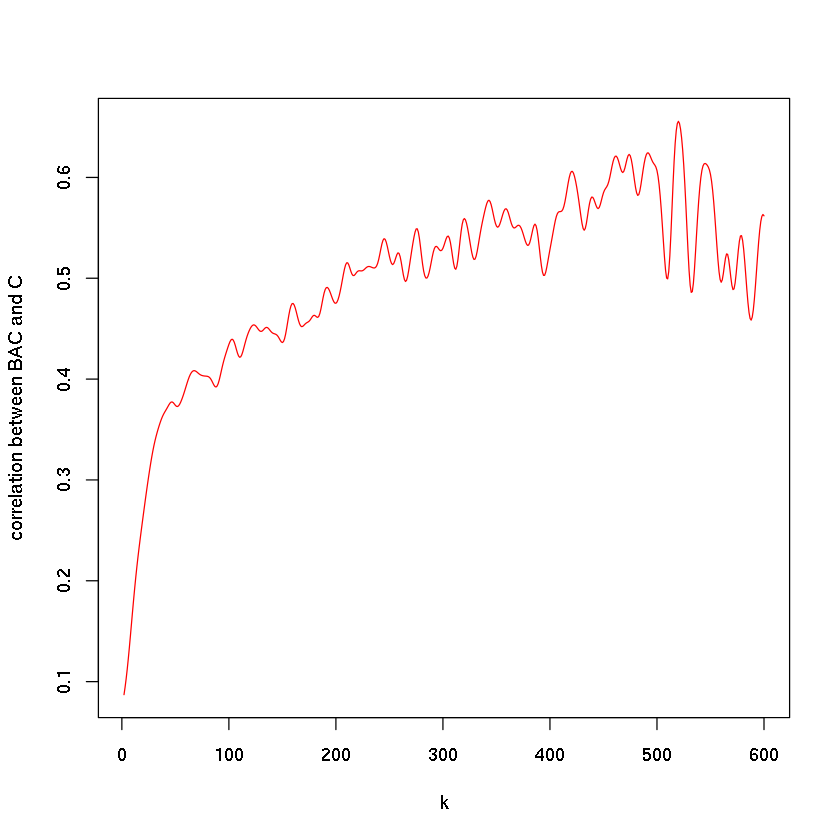

In [8]:
options(warn=-1)
corr_ret <- function (k, tq1 = tqBAC, tq2 = tqC){ # set default input
    # calculate the return
    tq1_return <- diff(log(as.numeric(aggregate_tq(tq1, k)$PRICE)))
    tq2_return <- diff(log(as.numeric(aggregate_tq(tq2, k)$PRICE)))
    return (corr_tq(tq1_return, tq2_return))
}
plot(2:600, ksmooth(2:600, sapply(2:600, function(k){corr_ret(k)}), "normal", bandwidth = 10)$y,
     col="red", type = "l", ylab="correlation between BAC and C",xlab="k")

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?
#### <font color=blue> Solution (d) </font>

In [9]:
options(warn=-1)
cat("The intraday correlation between BAC and C returns on 04-May-2012 is", corr_ret(2))options(warn=-1)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:89: unexpected symbol
1: options(warn=-1)
2: cat("The intraday correlation between BAC and C returns on 04-May-2012 is", corr_ret(2))options
                                                                                           ^


(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?
#### <font color=blue> Solution (e) </font>

In [10]:
# Download the data
getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")

# Calculate the corr between the returns
BAC_ret <- diff(log(as.numeric(BAC$BAC.Adjusted)))
C_ret   <- diff(log(as.numeric(C$C.Adjusted)))
cat("The historical correlation of daily BAC and C returns is", cor(BAC_ret, C_ret))

    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "BAC"

[1] "C"

The historical correlation of daily BAC and C returns is 0.7999082

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

#### <font color=blue> Solution  </font>

From lecture, we know that the Hayashi-Yoshida estimator is
$$HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}$$
where
$$v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset}$$

When they are synchronous, $v_{ij} = 1$, $HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(\Delta p^{(1)}_i)\,(\Delta p^{(2)}_j)$, we divide it by $T$, and would have the relized covariance.

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [11]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [12]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.0001232670
2000-01-10,0.0001306934


### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.
#### <font color=blue> Solution (a)</font>



Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16


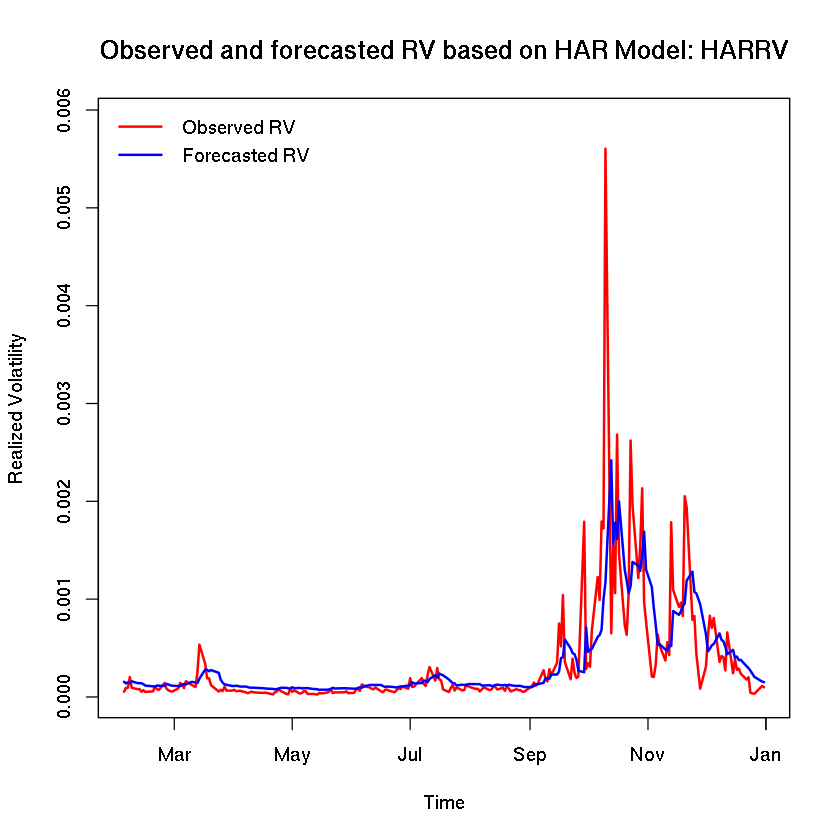

In [13]:
# Get sample daily Realized Volatility data
data(realized_library) 
# Select DJI in 2008
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance['2008']
# Remove NA's
DJI_RV <- DJI_RV[!is.na(DJI_RV)]
HAR_DJI_model <- harModel(data=DJI_RV, periods = c(1,5,22), RVest = c("rCov"), type="HARRV", h=1, transform=NULL)
plot(HAR_DJI_model)
summary(HAR_DJI_model)

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.
#### <font color=blue> Solution (b) </font>


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16


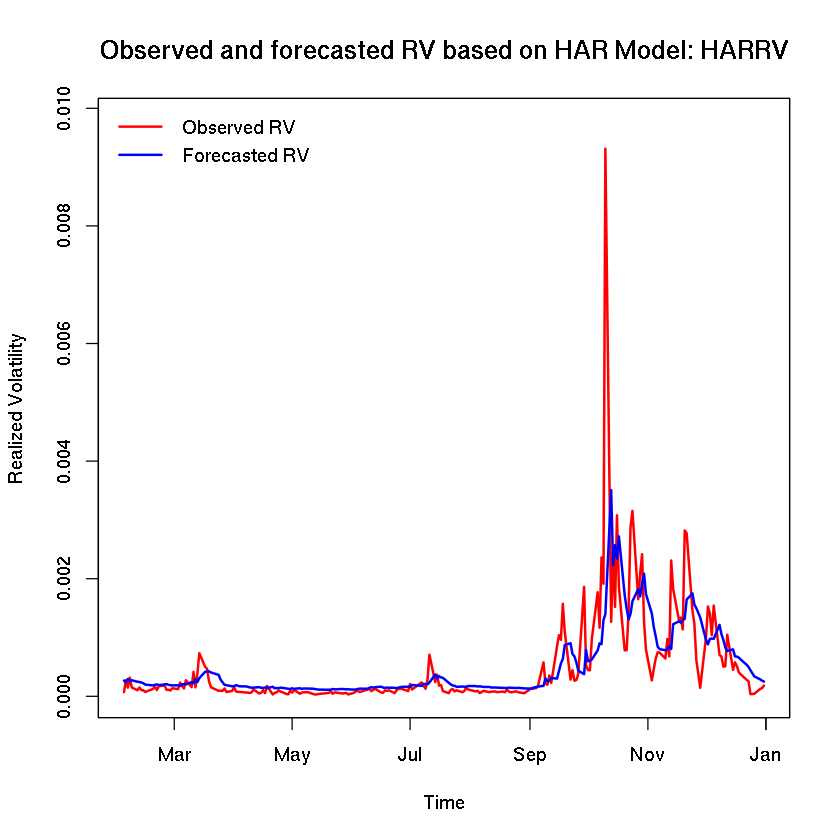

In [14]:
SPX_KRV <- spx.krv;
# Remove NA's and select data in 2008
SPX_KRV <- SPX_KRV[!is.na(SPX_KRV)]['2008']

HAR_KRV_model <- harModel(data=SPX_KRV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1,transform=NULL)
plot(HAR_KRV_model)
summary(HAR_KRV_model)

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?
#### <font color=blue> Solution (c) </font>


They are similar and most weight is on the 5-day RV ($\beta_2$).
From above results, we can draw a chart as below

  | $\beta$   | DJI RV  | SPX KRV|
  | :------ | :-------------------: |
  | $\beta_0$  | 4.432e-05 |7.164e-05|
  | $\beta_1$  | 1.586e-01 |1.523e-01|
  | $\beta_2$  | 6.213e-01| 5.512e-01|
  | $\beta_3$  | 8.721e-02|1.501e-01|
 
So we can say they are similar (since they are on the same order of magnitude) and most weight is on the 5-day RV ($\beta_2$).


(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.
#### <font color=blue> Solution (d) </font>

[1] "VIX"

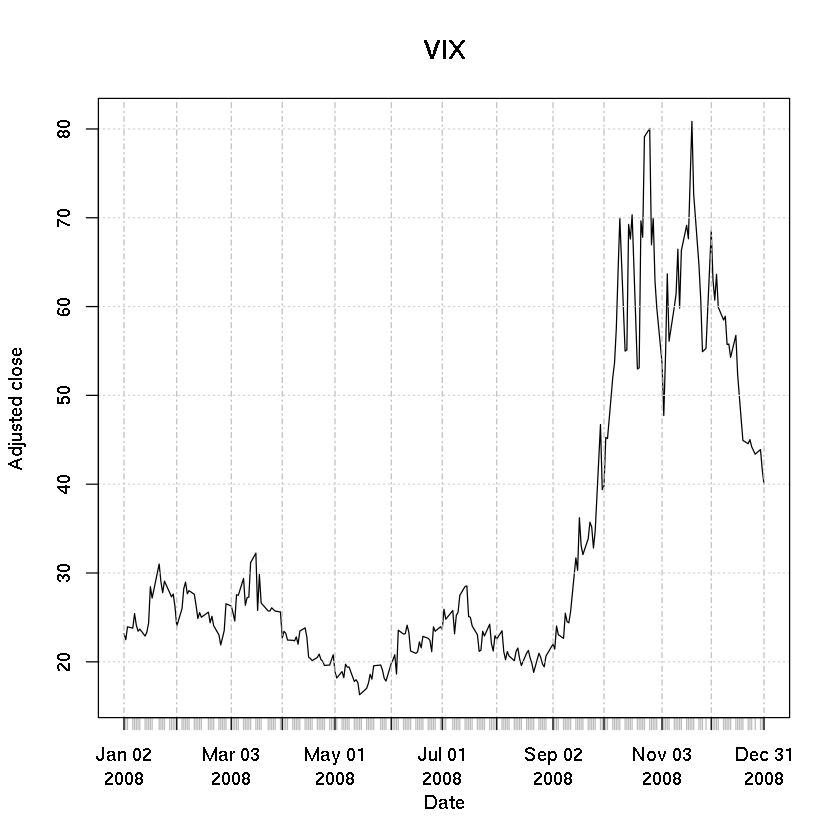

In [15]:
getSymbols(c("^VIX"), src = "yahoo", from = "2008-01-01", to = "2008-12-31")
plot(VIX$VIX.Adjusted, main = "VIX", ylab="Adjusted close", xlab="Date")

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.
#### <font color=blue> Solution (e) </font>

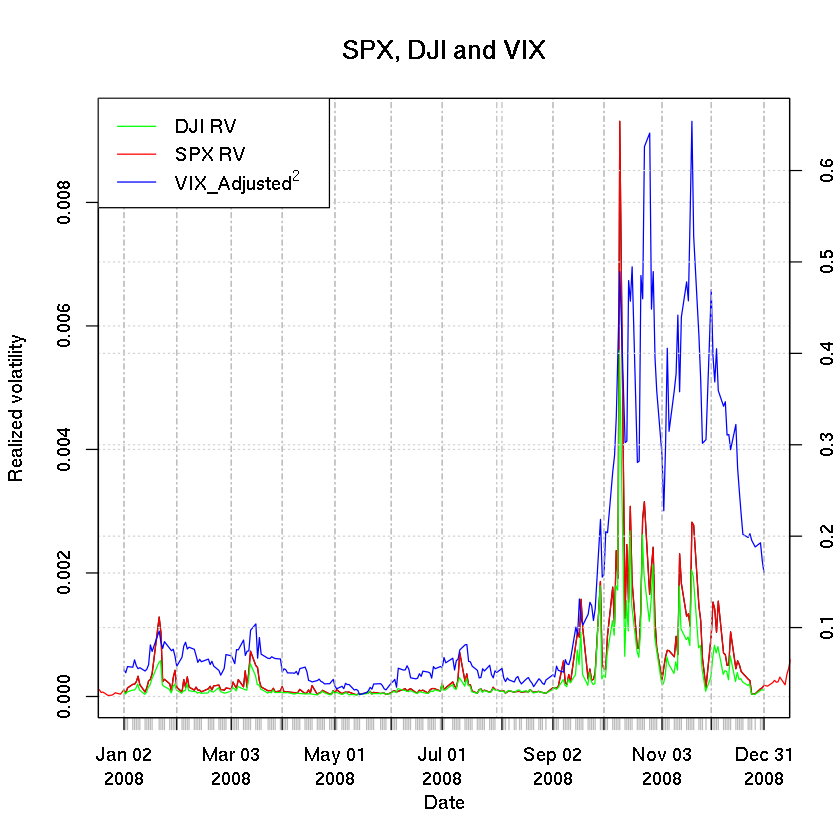

In [22]:
plot(spx.krv['2008'], main="SPX, DJI and VIX", ylab="Realized volatility", xlab="Date")
lines(spx.krv, col="red")
lines(DJI_RV, col="green")
# adding VIX
par(new = T)
plot(VIX$VIX.Adjusted^2/10000, col="blue", axes=F, main=NA, xlab=NA, ylab=NA)

# adding a scale on the right hand axis
axis(side = 4)
mtext(side = 4, line = 3, "VIX adjusted close")
legend("topleft", c("DJI RV","SPX RV",expression(VIX_Adjusted^2)), lty = c(1,1,1), col=c("green","red","blue"))